In [127]:
import  os
import  pandas as pd
from    tqdm import tqdm
import  numpy as np
from    multiprocessing import get_context as context
from    matplotlib import pyplot as plt
%matplotlib inline

# Read the files

# Parameters


header      = ['EventID','TrackID','Particle','EnergyDeposited','XPosition','YPosition','ZPosition','LocalTime','Volume', 'Initial Energy', 'Origin Volume', 'MigrantID']
PROCESSES   = os.cpu_count()-1
Pool        = context("fork").Pool

# Find the files
foldername  = f'../../la138_1M_C3'
os.system(f'rm -rf ../../la138_1M_C3.ipynb_checkpoints')
filenames   = os.listdir(foldername)

print(f'Found {len(filenames)} data files in {foldername}')

def parallel(function):
    def inner(input_array):
        # Parallelize excecution them
        with Pool(PROCESSES) as pool:
            output = list(tqdm(pool.imap(function, input_array),total=len(input_array)))
        return output 
    return inner

# Function to load a single file
def loadfile(filename):
    df = pd.read_csv(os.path.join(foldername,filename),skiprows=16,names=header)
    df.insert(0, 'Filename', filename)
    return df

Found 19 data files in ../../la138_1M_C3


In [2]:
data = pd.concat([loadfile(f) for f in filenames])
data

,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID
0,TES-run0-rank8_nt_hits.csv,0,1,La138,0.000000,-8.57428,34.1893,25.5601,0.000000e+00,crystal3_PV,1000.000000,crystal3_PV,-1
1,TES-run0-rank8_nt_hits.csv,0,6,nu_e,0.000000,-4.50000,41.9497,27.1720,2.972700e-02,crystal3_PV,266.695000,crystal3_PV,-1
2,TES-run0-rank8_nt_hits.csv,0,5,Ba138[1435.816],0.000000,-8.57428,34.1893,25.5601,0.000000e+00,crystal3_PV,0.000277,crystal3_PV,-1
3,TES-run0-rank8_nt_hits.csv,0,8,gamma,0.000000,-4.50000,29.1613,25.6784,2.159040e-02,crystal3_PV,1435.810000,crystal3_PV,-1
4,TES-run0-rank8_nt_hits.csv,0,8,gamma,0.000000,17.10390,2.5000,26.3060,1.360740e-01,crystal2_PV,1435.810000,crystal3_PV,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134128,TES-run0-rank4_nt_hits.csv,52630,11,e-,0.025167,-16.16640,17.6062,12.0575,1.202230e-05,crystal3_PV,25.936600,crystal3_PV,-1
1134129,TES-run0-rank4_nt_hits.csv,52630,11,e-,0.000000,-16.16640,17.6062,12.0575,1.202230e-05,crystal3_PV,25.936600,crystal3_PV,-1
1134130,TES-run0-rank4_nt_hits.csv,52630,2,e-,0.000428,-16.22440,17.4745,12.0272,6.781930e-07,crystal3_PV,5.243270,crystal3_PV,-1
1134131,TES-run0-rank4_nt_hits.csv,52630,2,e-,0.004815,-16.22440,17.4744,12.0272,1.909510e-06,crystal3_PV,5.243270,crystal3_PV,-1


In [3]:
crystal1 = data[data['Volume'] == 'crystal1_PV']
crystal2 = data[data['Volume'] == 'crystal2_PV']
crystal3 = data[data['Volume'] == 'crystal3_PV']
crystal4 = data[data['Volume'] == 'crystal4_PV']

In [4]:
gamma = crystal3[crystal3.Particle == 'gamma']
gamma

,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID
3,TES-run0-rank8_nt_hits.csv,0,8,gamma,0.000000,-4.50000,29.1613,25.67840,0.021590,crystal3_PV,1435.81000,crystal3_PV,-1
6,TES-run0-rank8_nt_hits.csv,0,4,gamma,0.005894,-8.48078,34.2386,25.44870,0.000512,crystal3_PV,31.81870,crystal3_PV,-1
10,TES-run0-rank8_nt_hits.csv,0,3,gamma,0.000834,-8.57264,34.1910,25.56100,0.000008,crystal3_PV,4.82365,crystal3_PV,-1
24,TES-run0-rank8_nt_hits.csv,1,6,gamma,0.000279,-6.42292,14.5219,27.06310,0.075102,crystal3_PV,788.74200,crystal3_PV,-1
25,TES-run0-rank8_nt_hits.csv,1,6,gamma,0.000012,-5.68416,14.2802,24.91950,0.082709,crystal3_PV,788.74200,crystal3_PV,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134094,TES-run0-rank4_nt_hits.csv,52629,19,gamma,0.006269,-7.03581,30.0916,8.44771,0.000168,crystal3_PV,11.83290,crystal3_PV,-1
1134107,TES-run0-rank4_nt_hits.csv,52630,7,gamma,0.000847,-17.25980,27.5030,9.70210,0.034512,crystal3_PV,1435.81000,crystal3_PV,-1
1134108,TES-run0-rank4_nt_hits.csv,52630,7,gamma,0.000000,-21.59870,32.2517,4.50000,0.062107,crystal3_PV,1435.81000,crystal3_PV,-1
1134121,TES-run0-rank4_nt_hits.csv,52630,9,gamma,0.001365,-17.21490,27.6479,9.66964,0.000017,crystal3_PV,4.63652,NaN,-1


In [5]:
emitted_gamma = gamma.groupby(['Filename', 'EventID'])['Initial Energy'].max().reset_index()
emitted_gamma

,Filename,EventID,Initial Energy
0,TES-run0-rank0_nt_hits.csv,0,788.742
1,TES-run0-rank0_nt_hits.csv,1,1435.810
2,TES-run0-rank0_nt_hits.csv,2,1435.810
3,TES-run0-rank0_nt_hits.csv,3,1435.810
4,TES-run0-rank0_nt_hits.csv,4,1435.810
...,...,...,...
999867,TES-run0-rank9_nt_hits.csv,52626,788.742
999868,TES-run0-rank9_nt_hits.csv,52627,788.742
999869,TES-run0-rank9_nt_hits.csv,52628,788.742
999870,TES-run0-rank9_nt_hits.csv,52629,788.742


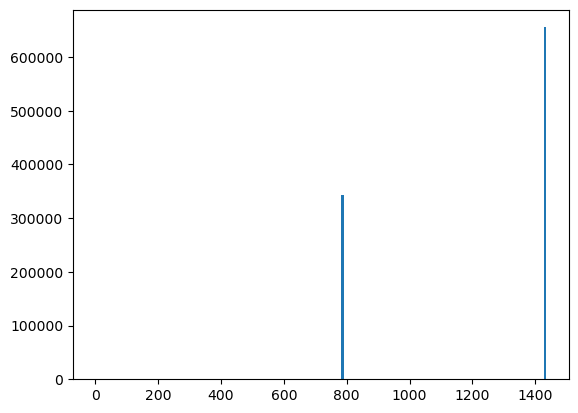

In [6]:
plt.clf()
counts, x, _ = plt.hist(emitted_gamma['Initial Energy'], bins = 200)
plt.show()
bin_centers = []
for index,value in enumerate(x):
    if index == 0: continue
    center = (value + x[index-1])/2
    bin_centers.append(center)

filtered_counts1 = []
filtered_center1 = []

for index, value in enumerate(counts):
    if value > 10**5:
        filtered_counts1.append(value)
        filtered_center1.append(bin_centers[index])

In [7]:
crystal3 = crystal3.sort_values(by=['Filename', 'EventID', 'TrackID','Particle']).reset_index()

In [121]:
test = crystal3.head(100000)
test = test.drop(columns=['index'])
pd.set_option('display.max_rows', 20)


In [122]:
test

,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID
0,TES-run0-rank0_nt_hits.csv,0,1,La138,0.000000,-17.9581,22.9311,23.03350,0.000000e+00,crystal3_PV,1000.000000,crystal3_PV,-1
1,TES-run0-rank0_nt_hits.csv,0,2,Ce138[788.744],0.000000,-17.9581,22.9311,23.03350,0.000000e+00,crystal3_PV,0.000416,crystal3_PV,-1
2,TES-run0-rank0_nt_hits.csv,0,3,anti_nu_e,0.000000,-19.4712,21.2791,27.50000,1.666770e-02,crystal3_PV,114.092000,crystal3_PV,-1
3,TES-run0-rank0_nt_hits.csv,0,4,e-,0.005323,-17.9520,22.9333,23.03200,3.555090e-05,crystal3_PV,143.964000,crystal3_PV,-1
4,TES-run0-rank0_nt_hits.csv,0,4,e-,0.017737,-17.9427,22.9378,23.02740,9.672370e-05,crystal3_PV,143.964000,crystal3_PV,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TES-run0-rank0_nt_hits.csv,5793,11,e-,0.000000,-13.5511,47.1798,8.38840,5.160100e-07,crystal3_PV,1.213150,crystal3_PV,-1
99996,TES-run0-rank0_nt_hits.csv,5793,12,e-,0.000642,-13.5302,47.1218,8.37861,7.535080e-07,crystal3_PV,5.938900,crystal3_PV,-1
99997,TES-run0-rank0_nt_hits.csv,5793,12,e-,0.005297,-13.5301,47.1218,8.37866,2.109710e-06,crystal3_PV,5.938900,crystal3_PV,-1
99998,TES-run0-rank0_nt_hits.csv,5793,12,e-,0.000000,-13.5301,47.1218,8.37866,2.109710e-06,crystal3_PV,5.938900,crystal3_PV,-1


In [123]:
# test = crystal3

rows = []

index = 0

while index < len(test):

    # print(index)
    row = test.iloc[index]
    # If the row is not gamma don't start the loop
    if row.Particle != 'gamma': index+= 1; continue

    # Otherwsie add the row
    rows.append(row)

    index += 1
    if index == len(test): break

    while test.iloc[index].Particle == 'e-':
        # print(index)
        rows.append(test.iloc[index])
        index += 1
        # If the current row is the last one stop
        if index == len(test): break

gamma_only = pd.DataFrame(rows)
gamma_only


,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID
11,TES-run0-rank0_nt_hits.csv,0,6,gamma,0.000000,-17.7745,21.6459,27.50000,1.551540e-02,crystal3_PV,788.74200,crystal3_PV,-1
16,TES-run0-rank0_nt_hits.csv,1,3,gamma,0.001787,-14.4615,40.6691,17.38350,5.968610e-04,crystal3_PV,36.31670,crystal3_PV,-1
20,TES-run0-rank0_nt_hits.csv,1,7,gamma,0.000000,-11.8640,27.6563,4.50000,6.171400e-02,crystal3_PV,1435.81000,crystal3_PV,-1
21,TES-run0-rank0_nt_hits.csv,1,8,e-,0.000471,-14.4612,40.6691,17.38290,6.215790e-06,crystal3_PV,34.52970,crystal3_PV,-1
22,TES-run0-rank0_nt_hits.csv,1,8,e-,0.034059,-14.4611,40.6699,17.38210,1.721060e-05,crystal3_PV,34.52970,crystal3_PV,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,TES-run0-rank0_nt_hits.csv,5793,11,e-,0.000000,-13.5511,47.1798,8.38840,5.160100e-07,crystal3_PV,1.21315,crystal3_PV,-1
99996,TES-run0-rank0_nt_hits.csv,5793,12,e-,0.000642,-13.5302,47.1218,8.37861,7.535080e-07,crystal3_PV,5.93890,crystal3_PV,-1
99997,TES-run0-rank0_nt_hits.csv,5793,12,e-,0.005297,-13.5301,47.1218,8.37866,2.109710e-06,crystal3_PV,5.93890,crystal3_PV,-1
99998,TES-run0-rank0_nt_hits.csv,5793,12,e-,0.000000,-13.5301,47.1218,8.37866,2.109710e-06,crystal3_PV,5.93890,crystal3_PV,-1


In [141]:
len(crystal3)/(19*100000)*13/60

1.9603996578947367

In [152]:
crystal3.Particle.unique()

array(['La138', 'Ce138[788.744]', 'anti_nu_e', 'e-', 'Ce138', 'gamma',
       'Ba138[1435.816]', 'nu_e', 'Ba138', 'e+', 'La139', 'Br79', 'Br81',
       'Cl35', 'Cl37'], dtype=object)

In [153]:
# Number of processes (adjust based on CPU availability)
PROCESSES = 19  # You mentioned you have 20 CPUs and can spare 19

# Function to process each file individually (your gamma and e- logic)
def processFile(filename):
    df = loadfile(filename)  # Load the file
    # df = df.iloc[0:100000]
    df = df[df.EnergyDeposited > 0.0]
    df = df[df['Volume'] == 'crystal3_PV']
    df = df.sort_values(by=['Filename', 'EventID', 'TrackID']).reset_index()


    rows = []
    index = 0

    while index < len(df):
        row = df.iloc[index]
        if row.Particle != 'gamma':
            index += 1
            continue

        rows.append(row)

        index += 1
        if index == len(df):
            break

        while index < len(df) and len(df.iloc[index].Particle) == 2:
            rows.append(df.iloc[index])
            index += 1
            if index == len(df):
                break

    gamma_only_df = pd.DataFrame(rows)
    return gamma_only_df


processFiles        = parallel(processFile)
processed           = processFiles(filenames)

data = pd.concat(processed)
data

100%|██████████| 19/19 [01:49<00:00,  5.77s/it]


,index,Filename,EventID,TrackID,Particle,EnergyDeposited,XPosition,YPosition,ZPosition,LocalTime,Volume,Initial Energy,Origin Volume,MigrantID
1,10,TES-run0-rank8_nt_hits.csv,0,3,gamma,0.000834,-8.57264,34.1910,25.56100,8.288300e-06,crystal3_PV,4.82365,crystal3_PV,-1
2,6,TES-run0-rank8_nt_hits.csv,0,4,gamma,0.005894,-8.48078,34.2386,25.44870,5.122360e-04,crystal3_PV,31.81870,crystal3_PV,-1
3,7,TES-run0-rank8_nt_hits.csv,0,9,e-,0.000845,-8.48084,34.2388,25.44830,4.383510e-06,crystal3_PV,25.92470,crystal3_PV,-1
4,8,TES-run0-rank8_nt_hits.csv,0,9,e-,0.025079,-8.48094,34.2389,25.44770,1.200720e-05,crystal3_PV,25.92470,crystal3_PV,-1
5,11,TES-run0-rank8_nt_hits.csv,0,10,e-,0.000012,-8.57264,34.1909,25.56100,5.046380e-07,crystal3_PV,3.98965,crystal3_PV,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503655,1134119,TES-run0-rank4_nt_hits.csv,52630,8,e-,0.036179,-17.22400,27.5953,9.61635,1.500320e-03,crystal3_PV,627.12100,crystal3_PV,-1
503656,1134121,TES-run0-rank4_nt_hits.csv,52630,9,gamma,0.001365,-17.21490,27.6479,9.66964,1.744380e-05,crystal3_PV,4.63652,NaN,-1
503657,1134123,TES-run0-rank4_nt_hits.csv,52630,10,e-,0.003272,-17.21490,27.6479,9.66968,1.253630e-06,crystal3_PV,3.27152,crystal3_PV,-1
503658,1134127,TES-run0-rank4_nt_hits.csv,52630,11,e-,0.000770,-16.16640,17.6057,12.05700,4.367100e-06,crystal3_PV,25.93660,crystal3_PV,-1


In [154]:
# spectrum1 = pd.concat([crystal1, crystal2])
spectrum1 = test
# spectrum1 = spectrum1[spectrum1.Particle == 'gamma']
# spectrum1 = spectrum1[spectrum1['EnergyDeposited'] > 0.0]
spectrum1 = spectrum1.groupby(['Filename', 'EventID'])['EnergyDeposited'].sum().reset_index()
spectrum1

,Filename,EventID,EnergyDeposited
0,TES-run0-rank0_nt_hits.csv,0,0.143964
1,TES-run0-rank0_nt_hits.csv,1,0.037449
2,TES-run0-rank0_nt_hits.csv,2,0.037449
3,TES-run0-rank0_nt_hits.csv,3,0.176306
4,TES-run0-rank0_nt_hits.csv,4,0.005961
...,...,...,...
5789,TES-run0-rank0_nt_hits.csv,5789,0.037449
5790,TES-run0-rank0_nt_hits.csv,5790,0.214251
5791,TES-run0-rank0_nt_hits.csv,5791,1.026910
5792,TES-run0-rank0_nt_hits.csv,5792,1.441768


In [155]:
spectrum1['EnergyDeposited'] = spectrum1['EnergyDeposited'] * 1000.0
spectrum1

,Filename,EventID,EnergyDeposited
0,TES-run0-rank0_nt_hits.csv,0,143.963760
1,TES-run0-rank0_nt_hits.csv,1,37.448849
2,TES-run0-rank0_nt_hits.csv,2,37.448722
3,TES-run0-rank0_nt_hits.csv,3,176.305888
4,TES-run0-rank0_nt_hits.csv,4,5.960974
...,...,...,...
5789,TES-run0-rank0_nt_hits.csv,5789,37.449042
5790,TES-run0-rank0_nt_hits.csv,5790,214.251020
5791,TES-run0-rank0_nt_hits.csv,5791,1026.910441
5792,TES-run0-rank0_nt_hits.csv,5792,1441.768276


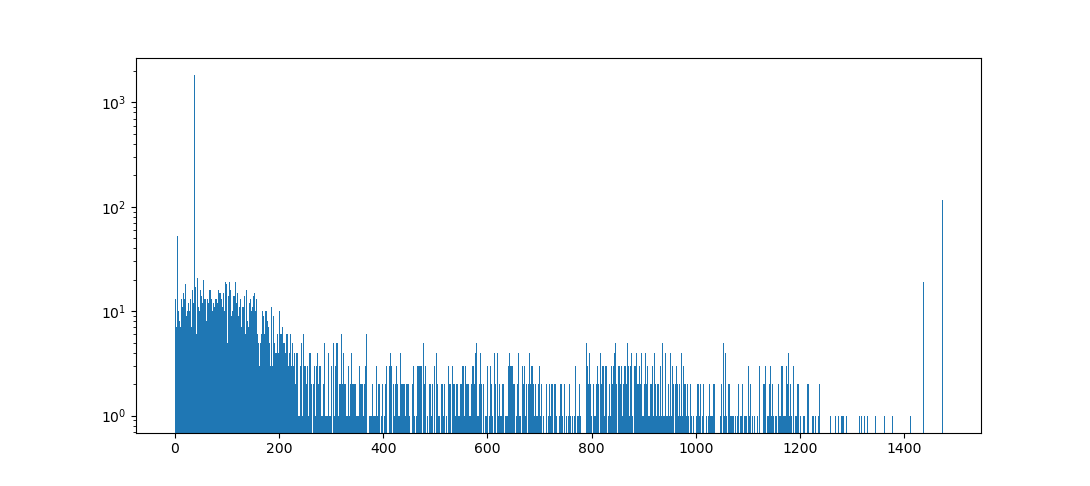

In [157]:
%matplotlib widget
plt.clf()

counts, x, _ = plt.hist(spectrum1['EnergyDeposited'], bins=1000)
plt.yscale('log')
# plt.ylim(0,10000)
plt.show()

In [14]:
total = 0

for index,value in enumerate(x[:-1]):
    if value < 1435.0: continue
    # if counts[index] < 1000: continue
    total += counts[index]

print(total)
print(total/filtered_counts1[1])

29371.0
0.044822266003537434


In [15]:
filtered_counts1

[342997.0, 655277.0]

In [16]:
bin_centers = []
for index,value in enumerate(x):
    if index == 0: continue
    center = (value + x[index-1])/2
    bin_centers.append(center)

In [17]:
plt.plot(bin_centers,counts)

In [18]:
filtered_counts = []
filtered_center = []

for index, value in enumerate(counts):
    if value > 0:
        filtered_counts.append(value)
        filtered_center.append(bin_centers[index])

In [19]:
plt.plot(filtered_center,filtered_counts, '-')

# doing only full depositions

In [20]:
emitted_gamma

,Filename,EventID,Initial Energy
0,TES-run0-rank0_nt_hits.csv,0,788.742
1,TES-run0-rank0_nt_hits.csv,1,1435.810
2,TES-run0-rank0_nt_hits.csv,2,1435.810
3,TES-run0-rank0_nt_hits.csv,3,1435.810
4,TES-run0-rank0_nt_hits.csv,4,1435.810
...,...,...,...
999867,TES-run0-rank9_nt_hits.csv,52626,788.742
999868,TES-run0-rank9_nt_hits.csv,52627,788.742
999869,TES-run0-rank9_nt_hits.csv,52628,788.742
999870,TES-run0-rank9_nt_hits.csv,52629,788.742


In [21]:
spectrum1

,Filename,EventID,EnergyDeposited
0,TES-run0-rank0_nt_hits.csv,0,143.963760
1,TES-run0-rank0_nt_hits.csv,1,37.448849
2,TES-run0-rank0_nt_hits.csv,2,37.448722
3,TES-run0-rank0_nt_hits.csv,3,176.305888
4,TES-run0-rank0_nt_hits.csv,4,5.960974
...,...,...,...
999995,TES-run0-rank9_nt_hits.csv,52626,888.398722
999996,TES-run0-rank9_nt_hits.csv,52627,816.661976
999997,TES-run0-rank9_nt_hits.csv,52628,324.739816
999998,TES-run0-rank9_nt_hits.csv,52629,604.081500


In [22]:
merged = pd.merge(emitted_gamma,spectrum1, on=['Filename', 'EventID'], how='inner')
merged

,Filename,EventID,Initial Energy,EnergyDeposited
0,TES-run0-rank0_nt_hits.csv,0,788.742,143.963760
1,TES-run0-rank0_nt_hits.csv,1,1435.810,37.448849
2,TES-run0-rank0_nt_hits.csv,2,1435.810,37.448722
3,TES-run0-rank0_nt_hits.csv,3,1435.810,176.305888
4,TES-run0-rank0_nt_hits.csv,4,1435.810,5.960974
...,...,...,...,...
999867,TES-run0-rank9_nt_hits.csv,52626,788.742,888.398722
999868,TES-run0-rank9_nt_hits.csv,52627,788.742,816.661976
999869,TES-run0-rank9_nt_hits.csv,52628,788.742,324.739816
999870,TES-run0-rank9_nt_hits.csv,52629,788.742,604.081500


In [23]:
merged = merged[abs(merged['Initial Energy'] - merged['EnergyDeposited']) < 0.1]
merged

,Filename,EventID,Initial Energy,EnergyDeposited
32971,TES-run0-rank0_nt_hits.csv,32974,788.742,788.762726
36459,TES-run0-rank0_nt_hits.csv,36462,788.742,788.830961
60974,TES-run0-rank10_nt_hits.csv,8336,788.742,788.836885
82940,TES-run0-rank10_nt_hits.csv,30306,788.742,788.801531
103974,TES-run0-rank10_nt_hits.csv,51341,788.742,788.780746
106695,TES-run0-rank11_nt_hits.csv,1431,788.742,788.776068
121399,TES-run0-rank11_nt_hits.csv,16140,788.742,788.837653
124615,TES-run0-rank11_nt_hits.csv,19356,788.742,788.827746
138272,TES-run0-rank11_nt_hits.csv,33015,788.742,788.792323
267346,TES-run0-rank14_nt_hits.csv,4222,788.742,788.795033


In [24]:
counts, x, _ = plt.hist(merged['EnergyDeposited'], bins=200)

In [25]:
bin_centers = []
for index,value in enumerate(x):
    if index == 0: continue
    center = (value + x[index-1])/2
    bin_centers.append(center)

In [26]:
len(bin_centers)

200

In [27]:
plt.plot(bin_centers,counts/filtered_counts1/2, '.')

ValueError: operands could not be broadcast together with shapes (200,) (2,) 

In [ ]:
x = bin_centers

In [ ]:
y = counts/filtered_counts1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [ ]:
# Apply Savitzky-Golay filter to smooth the curve
smoothed_y = savgol_filter(y, window_length=20, polyorder=3)
%matplotlib widget
# Plot the original and smoothed data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original', marker='.', alpha=0.6)
plt.plot(x, smoothed_y, label='Smoothed', linestyle='-', color='red')
plt.xlabel('Photon peak energy (keV)')
plt.ylabel('Efficiency')
plt.title('Efficiency curve with Savitzky-Golay Filter')
plt.legend()
plt.show()